<a href="https://colab.research.google.com/github/Anilabhimanyu/Data-Science/blob/main/Long_Short_Term_Memory_(LSTM_networks).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# LSTM Architecture

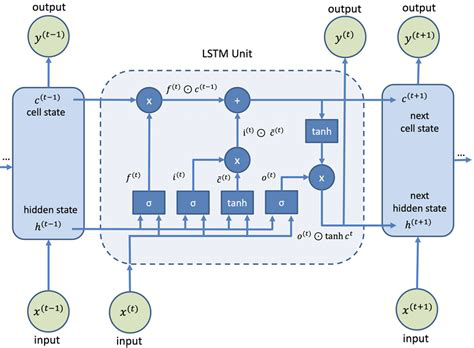

In [34]:
from PIL import Image
Image.open('/content/LSTM_archtecture.jpeg')

## Importing packages

In [22]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.metrics import mean_squared_error

# Creating Data

### watermark

In [9]:
!pip install watermark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.7 MB/s eta 0:00:00


In [10]:
import watermark
 
%load_ext watermark

%watermark -n -v -m -p numpy,scipy,keras,matplotlib,sklearn,pandas



Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.9.0

numpy     : 1.21.6
scipy     : 1.7.3
keras     : 2.11.0
matplotlib: 3.2.2
sklearn   : 1.0.2
pandas    : 1.3.5

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.10.147+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [11]:
%watermark -n -v -m -p numpy,scipy,keras,matplotlib,sklearn,pandas


Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.9.0

numpy     : 1.21.6
scipy     : 1.7.3
keras     : 2.11.0
matplotlib: 3.2.2
sklearn   : 1.0.2
pandas    : 1.3.5

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.10.147+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



## Dataframe

In [12]:
X = np.arange(0, 360)
y = np.sin(X*np.pi/10) ### we can take the any values
z = np.cos(X*np.pi/10)
dataset = pd.DataFrame({"X": X, "y":y,"z":z})
dataset = dataset.set_index("X")
dataset.head()

,y,z
X,,
0,0.000000,1.000000
1,0.309017,0.951057
2,0.587785,0.809017
3,0.809017,0.587785
4,0.951057,0.309017


Text(0.5, 1.0, 'sine wave')

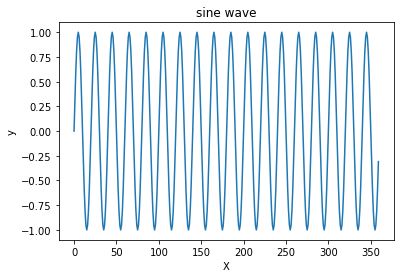

In [13]:
plt.plot(dataset['y'])
plt.xlabel('X')
plt.ylabel('y')
plt.title('sine wave')
# plt.gcf().set_size_inches(11,8)

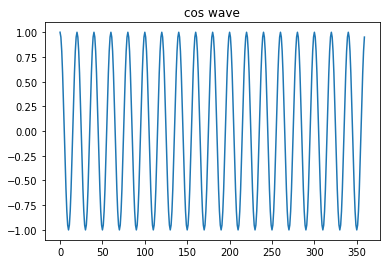

In [14]:
plt.plot(dataset['z'])
plt.title('cos wave')
plt.show()

# sine wave prediction

In [15]:
values_sin = dataset['y'].values.reshape(-1, 1)
X = values_sin[:-1]
y = values_sin[1:]



## for sine wave

In [16]:
n_points = len(values_sin)
train_points = int(2/3*n_points)+1
X_train1, X_test1 = X[:train_points], X[train_points:]
y_train1, y_test1 = X[:train_points], y[train_points:]
print("We have", len(X_train1), "training points and", X_test1.shape[0], "testing points")


We have 241 training points and 118 testing points


In [17]:
X_train1 = X_train1.reshape(X_train1.shape[0], X_train1.shape[1], 1)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1)
print(X_train1.shape)
print(X_test1.shape)

(241, 1, 1)
(118, 1, 1)


# LSTM Model

In [23]:
model = Sequential()
model.add(LSTM(units=10, input_shape=(X_train1.shape[1], X_train1.shape[2])))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## Compile LSTM model for sin wave

In [25]:
nb_epoch = 100

sin_model=model.fit(X_train1, y_train1, epochs=nb_epoch)

Epoch 1/100
8/8 [==============================] - 3s 4ms/step - loss: 0.4235
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4114
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3993
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3869
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3748
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3622
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3496
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3368
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3236
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3108
Epoch 11/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2974
Epoch 12/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2838
Epoch 13/100
8/8 [==============================] - 0s 4ms/st

In [26]:
y_train_pred = model.predict(X_train1)
y_test_pred = model.predict(X_test1)

4/4 [==============================] - 0s 3ms/step


In [27]:
dataset['RNN_sin_train_predict'] = 0
dataset['RNN_sin_test_predict'] = 0
dataset.loc[1:train_points, 'RNN_sin_train_predict'] = y_train_pred
dataset.loc[train_points+1:, 'RNN_sin_test_predict'] = y_test_pred

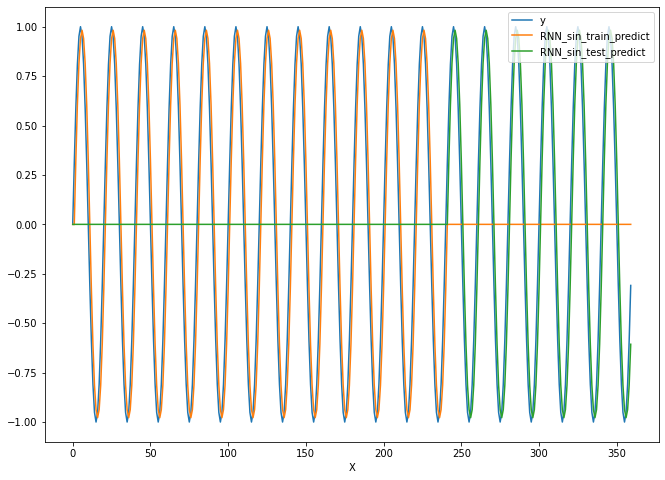

In [28]:
dataset[['y', 'RNN_sin_train_predict', 'RNN_sin_test_predict']].plot()
plt.gcf().set_size_inches(11, 8)

## for cos wave

In [29]:
values_cos=dataset['z'].values.reshape(-1,1)
X2=values_cos[:-1]
y2=values_cos[1:]

In [30]:
n_points = len(values_sin)
train_points = int(2/3*n_points)+1
X_train2, X_test2 = X2[:train_points], X2[train_points:]
y_train2, y_test2 = y2[:train_points], y2[train_points:]
print("We have", len(X_train2), "training points and", X_test2.shape[0], "testing points")


We have 241 training points and 118 testing points


In [31]:
# tf.reset_default_graph()
# keras.backend.clear_session()

X_train2 = X_train2.reshape(X_train2.shape[0], X_train2.shape[1], 1)
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], 1)
print(X_train2.shape)
print(X_test2.shape)

(241, 1, 1)
(118, 1, 1)


# LSTM Model for cos wave

In [32]:
nb_epoch = 100

model.fit(X_train2, y_train2, epochs=nb_epoch)

Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0489
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0481
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0478
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 11/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 12/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 13/100
8/8 [==============================] - 0s 5ms/st

In [ ]:
y_train_pred = model.predict(X_train2)
y_test_pred = model.predict(X_test2)

4/4 [==============================] - 0s 4ms/step


In [ ]:
dataset['RNN_cos_train_predict'] = 0
dataset['RNN_cos_test_predict'] = 0
dataset.loc[1:train_points, 'RNN_cos_train_predict'] = y_train_pred
dataset.loc[train_points+1:, 'RNN_cos_test_predict'] = y_test_pred

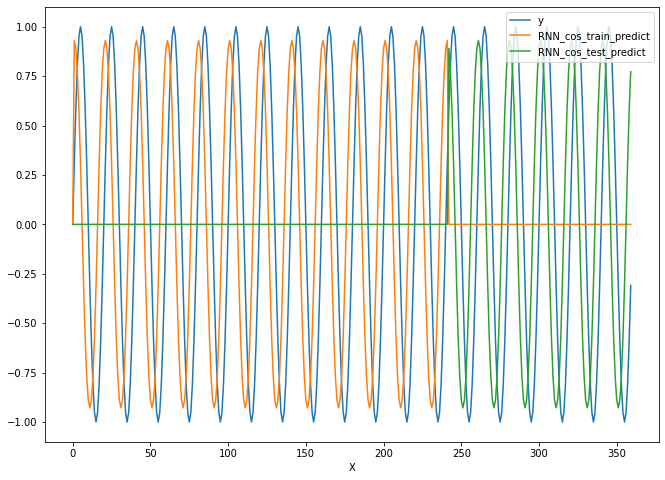

In [ ]:
dataset[['y', 'RNN_cos_train_predict', 'RNN_cos_test_predict']].plot()
plt.gcf().set_size_inches(11, 8)